# Advertising Prediction Notebook
In this notebook, the Advertising dataset of Kaggle is analyzed (https://www.kaggle.com/fayomi/advertising). It consists of 10 columns with a total of 1000 rows. The use case consists of predicting whether a website visitor will click on an advertisement or not based on his demographics and internet usage data.
The notebook's approach is based on the CRISP-DM model, which clearly divides the phases in a data science project.
<img src="https://statistik-dresden.de/wp-content/uploads/2012/04/CRISP-DM_Process_Diagram1.png" alt="CRISP-DM Modell" width="300" height="300">


## 1. Business Understanding

From an economic perspective, it is necessary for Facebook to keep customers on their streaming platform for as long as possible. However, the question now arises as to how this can be achieved. The problem here is that Netflix has a good data basis, but this must first be processed and then developed into a digital service. Furthermore, it must be specified which data is available at all, which services can be implemented based on this data, and what added value the customer and Netflix itself derive from this. As a service, this paper deals with a recommendation model that suggests a selection of similar offers to the user for each film or series offered.

## 2. Data and Data Understanding

In this notebook, the advertising dataset of Kaggle is analyzed. It consists of 10 columns with a total of 1000 rows. The use case consists of predicting whether a website visitor will click on an advertisement or not based on his demographics and internet usage data. The Clicked on Ad target value is perfectly balanced between the two categories (0.1), as the mean value is exactly 0.5. This means that there are the same number of values for both categories (500 each). In addition, we can see that the Ad Topic Line and City features have very many unique values (1000 and 969 "unique" values, respectively), which means that. It can be seen that there are significant differences between the user profiles. Users who click on an ad (Clicked on Ad=1) spend less time on the website on average, are older (approx. 40), have a lower income and use the Internet significantly less. From this information, a rough user profile can already be derived, which could also be relevant for a company's marketing and sales to optimize their measures based on the user profiles.

## 2.1. Import of Relevant Modules

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for the visualization libra
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## 2. 2. Read Data.csv

In [2]:
# Load the CSV-file in a DataFrame
data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Predicting_clicks_on_online_advertising_by_Facebook_data.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 3. Data Analysis

The purpose of this chapter is to review, analyze, and prepare the data.

In [3]:
# Info of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
# Compute different metrics for each column
data.describe(include="all")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,2016-03-27 00:53:11,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


### Missing values

In [5]:
# Number of missing values in each column
data.isnull().sum() 

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### Duplicates

In [6]:
# Displays duplicate records
data.duplicated().sum() 

0

## 3.1 Explorative data analysis
In this chapter, initial analyses and visualizations will be made.

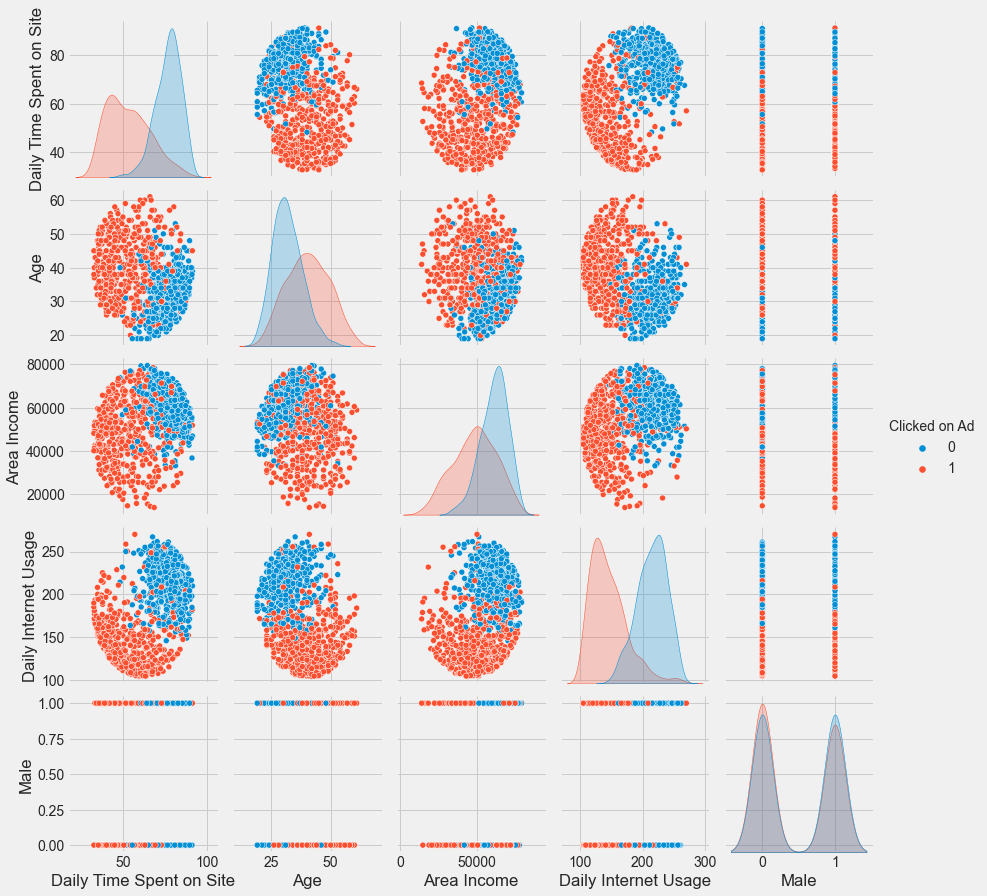

In [7]:
# Create Pairplots
sns.pairplot(data, hue='Clicked on Ad')

In [8]:
# For each label, count the occurence
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

It can be seen that the data set is perfectly balanced, i.e. there are exactly 500 records for both classes.

In [ ]:
# User profile analysis
data.groupby('Clicked on Ad')['Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

In [ ]:
# Scatterplot: Daily Time Spent on Site vs. Age in context of Clicked on Ad
sns.scatterplot(x="Daily Time Spent on Site", y="Age", data=data, hue="Clicked on Ad")

In [ ]:
# Scatterplot: Daily Time Spent on Site vs. Area Income in context of Clicked on Ad
sns.scatterplot(x="Daily Time Spent on Site", y="Area Income", data=data, hue="Clicked on Ad")

In [ ]:
# Scatterplot: Daily Time Spent on Site vs. Daily Internet Usage in context of Clicked on Ad
sns.scatterplot(x="Daily Time Spent on Site", y="Daily Internet Usage", data=data, hue="Clicked on Ad")

In [ ]:
# Scatterplot: Age vs. Daily Internet Usage in context of Clicked on Ad
sns.scatterplot(x="Age", y="Daily Internet Usage", data=data, hue="Clicked on Ad")

## 3.2 Distribution plots for all features with numerical values

Distribution plots are created to identify outliers in the data and better understand the data

In [ ]:
# Distribution plot of Age
sns.distplot(data["Age"])
plt.title("Age Distribution")

In [ ]:
# Cut the left 1% and right 99% quantile to avoid outliers
q_small = data["Age"].quantile(0.01)
q_big = data["Age"].quantile(0.99)
data = data[(data["Age"]>q_small) & (data["Age"]<q_big)]

In [ ]:
# Distribution plot of Daily Time Spent on Site
sns.distplot(data["Daily Time Spent on Site"])
plt.title("Daily Time Spent on Site Distribution")

In [ ]:
# Cut the left 1% and right 99% quantile to avoid outliers
q_small = data["Daily Time Spent on Site"].quantile(0.01)
q_big = data["Daily Time Spent on Site"].quantile(0.99)
data = data[(data["Daily Time Spent on Site"]>q_small) & (data["Daily Time Spent on Site"]<q_big)]

In [ ]:
# Distribution plot of Area Income
sns.distplot(data["Area Income"])
plt.title("Area Income Distribution")

In [ ]:
# Cut the left 1% and right 99% quantile to avoid outliers
q_small = data["Area Income"].quantile(0.01)
q_big = data["Area Income"].quantile(0.99)
data = data[(data["Area Income"]>q_small) & (data["Area Income"]<q_big)]

In [ ]:
# Distribution plot of Area Income with method Boxcox and lambda = 1.5
# The other functions have also been tried out, but the boxcox method fits the best
from scipy.stats import boxcox
#function = lambda x: 1/x or np.log(x) or np.sqrt(x)
#function = lambda x: np.log(x)
#log_data = data["Area Income"].apply(function)
data['Area Income'] = boxcox(data['Area Income'], lmbda=1.5)
sns.distplot(data['Area Income'])
plt.title("Area Income: Boxcox")

In [ ]:
# Distribution plot of Daily Internet Usage
sns.distplot(data["Daily Internet Usage"])
plt.title("Daily Internet Usage Distribution")

In [ ]:
# Cut the left 1% and right 99% quantile to avoid outliers
q_small = data["Daily Internet Usage"].quantile(0.01)
q_big = data["Daily Internet Usage"].quantile(0.99)
data = data[(data["Daily Internet Usage"]>q_small) & (data["Daily Internet Usage"]<q_big)]

In [ ]:
# Distribution plot of Clicked on Ad
sns.distplot(data["Clicked on Ad"])
plt.title("Clicked on Ad Distribution")

<a id="cell1.3"></a>
## 4. Correlations
Now the correlations of all numerical features are calculated and reflected in a correlation matrix.

In [ ]:
# Create heatmap
sns.heatmap(data.corr(), annot=True)

t can be seen that Daily Time Spent on Site and Daily Internet Usage correlate. There is also a strong negative correlation between Daily Internet Usage / Daily Time Spent on Site and Clicked on Ad.
However, significant correlations that lead to the removal of a feature do not exist (assumption: if correlation is greater than 0.9).

<a id="cell2"></a>
# 5. Data preparation
In this section, the dataset will be prepared for machine learning.

<a id="cell2.1"></a>
## 5.1 Feature Engineering
In this section, feature engineering is performed. Here, important information is extracted from the raw data.

<a id="cell2.1.1"></a>
### 5.1.1 Timestamp
There is a Timestamp feature in the dataset. This could be important for prediction, as there can be a correlation between the user click and the time.

In [ ]:
# Extract datetime variables using timestamp column
data['Timestamp'] = pd.to_datetime(data['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
data['Month'] = data['Timestamp'].dt.month 
# Creates a new column called Month
data['Day'] = data['Timestamp'].dt.day     
# Creates a new column called Day
data['Hour'] = data['Timestamp'].dt.hour   
# Creates a new column called Hour
data["Weekday"] = data['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
data = data.drop(['Timestamp'], axis=1) # deleting timestamp

In this section, feature engineering is performed. Here, important information is extracted from the raw data.


In [ ]:
# Look at first 5 rows of the newly created DataFrame
data.head()

In [ ]:
# Create heatmap
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data.corr(), annot=True)

In [ ]:
# Barplots for the Weekday feature in context of the Clicked on Ad
ax = sns.barplot(x="Weekday", y="Clicked on Ad", data=data, estimator=sum)

In [ ]:
# Creating pairplot to check effect of datetime variables on target variable (variables which were created)
pp = sns.pairplot(data, hue= 'Clicked on Ad', vars = ['Month', 'Day', 'Hour', 'Weekday'], palette= 'husl')

There is probably no sifnificant effect through time.

In [ ]:
# Info of the dataframe
data.info()

In [ ]:
# Reset the index
data.reset_index(drop=True, inplace=True)

<a id="cell2.1.2"></a>
### 5.1.2 Age
We can make intervals for age.

In [ ]:
# Creating Bins on Age column
data['Age_bins'] = pd.cut(data['Age'], bins=[0, 18, 30, 45, 70], labels=['Young', 'Adult','Mid', 'Elder'])

In [ ]:
# Count for each category of Age_bins
data['Age_bins'].value_counts()

In [ ]:
# Dummy encoding on Age_bins column
data = pd.concat([data, pd.get_dummies(data['Age_bins'], prefix='Age', drop_first=True)], axis=1) 

<a id="cell2.2"></a>
## 5.2 Final dataset creation

In [ ]:
# Remove redundant and no predictive power features
data.drop(['Country', 'Ad Topic Line', 'City', 'Day', 'Month', 'Weekday', 
             'Hour', 'Age', 'Age_bins'], axis = 1, inplace = True)

<a id="cell2.3"></a>
## 5.3 Record splitting and standardization
Split the data set into features (X) and target variable (y).

In [ ]:
# First 5 rows of the dataset
data.head()

In [ ]:
# Prepare and split data for prediction
from sklearn.model_selection import train_test_split
X = data.drop(['Clicked on Ad'],1)
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Standardization of the Features
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
# Dimensions of the different splits (rows -> number of samples, columns -> number of features)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

<a id="cell3"></a>
# 6 Model building
Now the individual algorithms can be trained and evaluated.

In [ ]:
# Import required libraries for the model creation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

<a id="cell3.1"></a>
## 6.1 Logistic regression

In [ ]:
# Sample sigmoid curve
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.title("Sigmoid Function")

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Classifier
lr = LogisticRegression(penalty="l2", C= 0.1, random_state=42)
lr.fit(X_train_std, y_train)

# Predict and evaluate using model
lr_training_pred = lr.predict(X_train_std)
lr_test_pred = lr.predict(X_test_std)
lr_training_prediction = accuracy_score(y_train, lr_training_pred)
lr_test_prediction = accuracy_score(y_test, lr_test_pred)

print( "Accuracy of Logistic regression training set:",   round(lr_training_prediction,3))
print( "Accuracy of Logistic regression test set:",   round(lr_test_prediction,3))
print(classification_report(y_test, lr.predict(X_test_std)))
tn, fp, fn, tp = confusion_matrix(y_test, lr_test_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*((precision*recall)/(precision+recall))
print("True Positive: %i"  %tp)
print("False Positive: %i" %fp)
print("True Negative: %i" %tn)
print("False Negative: %i" %fn)
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

In [ ]:
print('Intercept:', lr.intercept_)
weights = pd.Series(lr.coef_[0],
                    index=X.columns.values)
weights.sort_values(ascending = False)

In particular, Daily Time Spent on Site, Daily Internet Usage, and Area Income have a greater impact.

<a id="cell3.2"></a>
## 6.2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree Classifier
estimator = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

# Predict and evaluate using model
estimator.fit(X_train_std,y_train)

# Predict and evaluate using model
rf_training_pred = estimator.predict(X_train_std)
rf_test_pred = estimator.predict(X_test_std)
rf_training_prediction = accuracy_score(y_train, rf_training_pred)
rf_test_prediction = accuracy_score(y_test, rf_test_pred)

print("Accuracy of Decision Tree training set:",   round(rf_training_prediction,3))
print("Accuracy of Decision Tree test set:",   round(rf_test_prediction,3))
print(classification_report(y_test, lr.predict(X_test_std)))
tn, fp, fn, tp = confusion_matrix(y_test, rf_test_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*((precision*recall)/(precision+recall))
print("True Positive: %i"  %tp)
print("False Positive: %i" %fp)
print("True Negative: %i" %tn)
print("False Negative: %i" %fn)
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")